In [25]:
import pyaudio
# imports
import matplotlib.pyplot as plt
import numpy as np
import wave, sys
import librosa # this is the cooler way to plot the sound
import librosa.display
import pandas as pd

In [26]:
filename = "C:\sound\soundfiles\\recorded.wav"
filedir = "soundfiles//"
filename2 ="test.wav"
chunk = 1024
FORMAT = pyaudio.paInt16
channels = 1 # this would change to 2 channels later
sample_rate = 44100
record_seconds = 60

In [27]:
p = pyaudio.PyAudio()
stream = p.open( format=FORMAT,
channels=channels,
rate=sample_rate,
input=True,
output=True,
frames_per_buffer=chunk)

#record audio
frames = []
print("started recording")
for i in range(int(sample_rate /chunk * record_seconds)):
    data = stream.read(chunk)
    frames.append(data)
print("stop")
stream.stop_stream()
stream.close()
p.terminate()

#save to .wav file
wf = wave.open(filename, "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(sample_rate)
wf.writeframes(b"".join(frames))
wf.close()

started recording


KeyboardInterrupt: 

In [28]:
from pydub import AudioSegment
#t1 = t1 * 1000 #Works in milliseconds
#t2 = t2 * 1000
#newAudio = AudioSegment.from_wav(filename)
#newAudio = newAudio[t1:t2]
#newAudio.export('newSong.wav', format="wav") #Exports to a wav file in the current path.

C:\Python38-64\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [29]:

# this fn is janky and need some work
def split_save_files(_filename, _save_dir = '', _num_splits = 1,):
    temp_aud = AudioSegment.from_file(_filename)
    temp_secs =  int(temp_aud.duration_seconds)

    #number of seconds in each variable
    interval = int(temp_secs / _num_splits)
    print(interval)
    for x in range(0,temp_secs,interval):
        t1 = x * 1000 # mesures in milli
        t2 = (x + interval) * 1000
        clip = temp_aud[t1:t2]
        temp_file_name =_save_dir + str(t1) + "_" + str(t2) + ".wav"
        clip.export(temp_file_name, format="wav")
        #does python go out of range? 

split_save_files(_filename=filename,_save_dir=filedir,_num_splits=59)


1


In [9]:
import random
import math

In [10]:

def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

class pointGen:
   
    def __init__(self,radius: float,distance_mics = 10):
        self.origin = (0,0)
        self.X_max_value = radius
        self.X_min_value = -radius
        self.Y_max_value = radius
        self.Y_min_value = 0
        self.point_L_mic = (-distance_mics/2,0)
        self.point_R_mic = ( distance_mics/2,0)
        self.SPEEDOFSOUNDCMPS = 34300 #centimeater per second
    def genRandEe(self):
        output = random.uniform(self.X_min_value, self.X_max_value), random.uniform(self.Y_min_value, self.Y_max_value)
        print(output)
        dist_L_mic = math.dist(output,self.point_L_mic)
        dist_R_mic = math.dist(output,self.point_R_mic)
        time_to_L_mic = dist_L_mic / self.SPEEDOFSOUNDCMPS#centimeater per second
        time_to_R_mic = dist_R_mic / self.SPEEDOFSOUNDCMPS#centimeater per second
        return int((time_to_L_mic - time_to_R_mic)*sample_rate),angle_between(output,pg.origin)
        #find the distance

pg = pointGen(radius=600000,distance_mics=100)
pg.genRandEe()



(-292269.74743176845, 29046.9419885121)


(-127, 174.32435269209302)

In [51]:
from scipy.io.wavfile import write
def gen_file_structure_and_csv(_filedir = filedir,_number_of_shifts_per_instance = 1):
    ch1dir = "ch1//"
    ch2dir = "ch2//"
    d = {'ch1_file': [], 'ch2_file': [], 'angle': [] , 'shift':[]}
    #df = pd.DataFrame(data=d)
    # generate a point
    _pg = pointGen(radius=60000,distance_mics=100)
    for file in os.listdir(_filedir):
        try:
            raw = wave.open(_filedir + file)
            signal = raw.readframes(-1)
            signal = np.frombuffer(signal, dtype ="int16")
            
            for ind in range(_number_of_shifts_per_instance):
                shift,angle = _pg.genRandEe()
                # shift file save copy
                ch2 = np.roll(signal,shift=shift)
                print(file,shift,signal)

                d['ch1_file'].append(str(_filedir+ ch1dir + str(ind) + "_" + file))
                d['ch2_file'].append(str(_filedir+ ch2dir + str(ind) + "_" + file))
                d['angle'].append(angle)
                d['shift'].append(shift)
                print(_filedir + ch1dir + str(ind)+ "_" + file)
                write(str(_filedir+ ch1dir + str(ind) + "_" + file), sample_rate, signal)
                write(str(_filedir+ ch2dir + str(ind) + "_" + file), sample_rate, ch2)
            
        except:
            print(file + "did not shift correctly")
        # split into ch1 dir and ch2 dir
    df = pd.DataFrame(data=d)
    return df
        


    # shift channel 2 by frame delay 
    # store ch1 in ch1 der and ch2 in ch2 dir

df = gen_file_structure_and_csv(_number_of_shifts_per_instance=10)
    


(-4061.2704866815184, 28342.831922258763)
0_1000.wav -18 [ 0  0 -1 ... 36 36 37]
soundfiles//ch1//0_0_1000.wav
(14506.658163123866, 47737.43591815099)
0_1000.wav 37 [ 0  0 -1 ... 36 36 37]
soundfiles//ch1//1_0_1000.wav
(35873.70386677109, 25945.482851881174)
0_1000.wav 104 [ 0  0 -1 ... 36 36 37]
soundfiles//ch1//2_0_1000.wav
(47360.04178420686, 56323.65224474118)
0_1000.wav 82 [ 0  0 -1 ... 36 36 37]
soundfiles//ch1//3_0_1000.wav
(-465.85690798934957, 54361.83669901931)
0_1000.wav -1 [ 0  0 -1 ... 36 36 37]
soundfiles//ch1//4_0_1000.wav
(-48434.81089866256, 56588.782240566485)
0_1000.wav -83 [ 0  0 -1 ... 36 36 37]
soundfiles//ch1//5_0_1000.wav
(18449.537616197107, 48097.29454360957)
0_1000.wav 46 [ 0  0 -1 ... 36 36 37]
soundfiles//ch1//6_0_1000.wav
(-22330.864660532607, 52737.02298844671)
0_1000.wav -50 [ 0  0 -1 ... 36 36 37]
soundfiles//ch1//7_0_1000.wav
(-27700.973010132944, 3800.3746730906673)
0_1000.wav -127 [ 0  0 -1 ... 36 36 37]
soundfiles//ch1//8_0_1000.wav
(-27468.53427114

In [52]:
print(df.dtypes)
df.to_csv("data.csv")

ch1_file     object
ch2_file     object
angle       float64
shift         int64
dtype: object


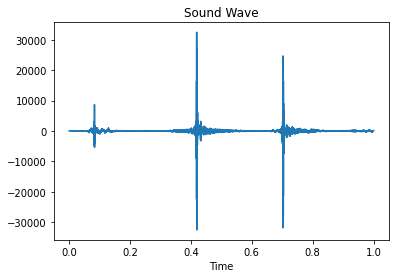

In [12]:
# shows the sound waves 
def visualize(path: str):

	# reading the audio file
	raw = wave.open(path)
	
	# reads all the frames
	# -1 indicates all or max frames
	signal = raw.readframes(-1)
	signal = np.frombuffer(signal, dtype ="int16")
	
	# gets the frame rate
	f_rate = raw.getframerate() 

	# to Plot the x-axis in seconds
	# you need get the frame rate
	# and divide by size of your signal
	# to create a Time Vector
	# spaced linearly with the size
	# of the audio file
	time = np.linspace(
		0, # start
		len(signal) / f_rate,
		num = len(signal)
	)

	# using matplotlib to plot
	# creates a new figure
	plt.figure(1)
	
	# title of the plot
	plt.title("Sound Wave")
	
	# label of x-axis
	plt.xlabel("Time")
	
	# actual plotting
	plt.plot(time, signal)
	
	# shows the plot
	# in new window
	plt.show()

	# you can also save
	# the plot using
	# plt.savefig('filename')
visualize(filename2)


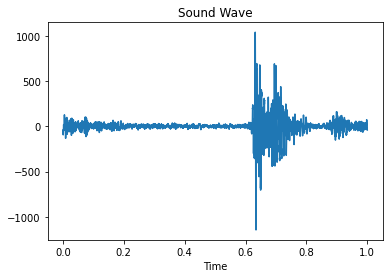

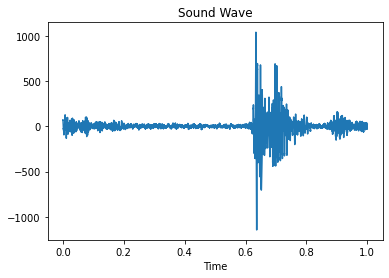

In [14]:
visualize("C:\sound\soundfiles\ch2\\57000_58000.wav")
visualize("C:\sound\soundfiles\ch1\\57000_58000.wav")

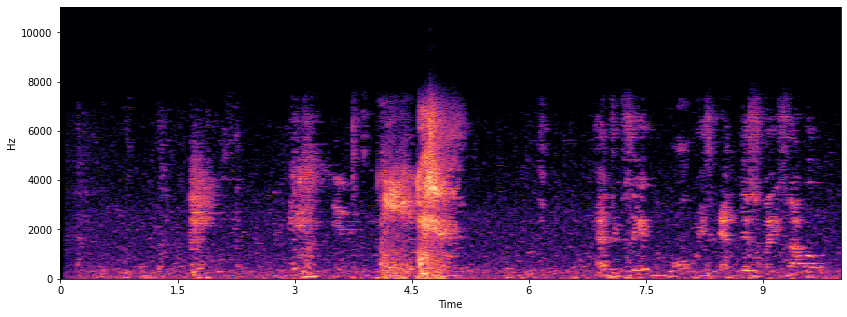

In [85]:
# when this is usually the way people in industry look at the sound waves this is a Fouer transorm view
x, sr = librosa.load(filename)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

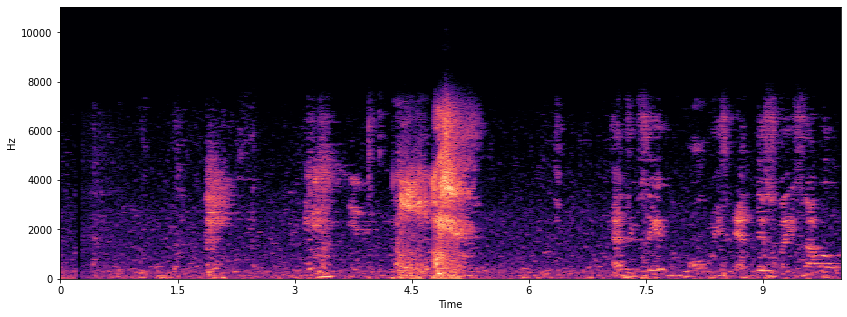

In [86]:
x, sr = librosa.load(filename)
wav_roll = np.roll(x,int(sample_rate/10))
X = librosa.stft(wav_roll)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
#audio_data = [x- time_shift for x in audio_data]

In [217]:

def graphFFT(wav_n):
    X = librosa.stft(wav_n)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #audio_data = [x- time_shift for x in audio_data]

def getwave(filename1):
    x,sr = librosa.load(filename1)
    return 

def rollwave(x):
    return np.roll(x,int(sample_rate/10))
    #audio_data = [x- time_shift for x in audio_data]
def gennnoise(x):
    return x + 0.009*np.random.normal(0,1,len(x))
    #test out my fns
def gen_dif_data(filename1):
    ch1_wav = gennnoise(rollwave(getwave(filename1)))
    ch2_wav = gennnoise(getwave(filename1))
    return ch1_wav , ch2_wav


def generate_offset_data(_filename,_offset = 0):
    _sample_rate ,wav_from_file = scipy.io.wavfile.read(_filename)
    ch1 = np.array(wav_from_file)
    ch2 = np.roll(ch1,shift=_offset)
    print(ch1)
    return ch1,ch2
    # roll one by off set
    # add  

ch1,ch2 = generate_offset_data(_filename = filename,_offset = sample_rate/10)


NameError: name 'scipy' is not defined

<TensorDataset shapes: (60,), types: tf.string>


In [4]:
# https://www.sweetwater.com/store/detail/CK1elektron--elektron-audio-cv-split-cable-kit?utm_source=google&utm_medium=organicpla&mrkgadid=3274408772&mrkgcl=28&mrkgen=gpla&mrkgbflag=0&mrkgcat=accessories&acctid=21700000001645388&dskeywordid=92700067097751565&lid=92700067097751565&ds_s_kwgid=58700007462857716&ds_s_inventory_feed_id=97700000007215323&dsproductgroupid=411460338651&product_id=CK1elektron&prodctry=US&prodlang=en&channel=online&storeid=&device=c&network=g&matchtype=&adpos=largenumber&locationid=9033129&creative=555205126033&targetid=aud-909333224613%3Apla-411460338651&campaignid=15034343250&awsearchcpc=1&gclid=CjwKCAjwi6WSBhA-EiwA6Niok1vZvDtasGotPEEXT0NXcryLJzMLMjvUlvo9wovBpIMCnuCG6MW4oRoChg4QAvD_BwE&gclsrc=aw.ds

# mics
# https://www.amazon.com/Hands-free-Microphone-Sennheiser-Transmitter-Cancelling/dp/B017ECWI2Y/ref=sr_1_5?crid=1VTLCQFTP5CBR&keywords=mono+microphone&qid=1649013915&sprefix=mono+mi%2Caps%2C159&sr=8-5

#https://www.amazon.com/Microphone-Professional-Omnidirectional-Microphones-Conference/dp/B07CW9ZRW9?th=1

import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
#

In [68]:
# role, call gen noise then qorelate
# 44,
DIMS = 44000

model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Conv1D(activation='relu',filters=1 , kernel_size=2 ,strides=2),
        tf.keras.layers.MaxPool1D(pool_size=2,strides=2),
        tf.keras.layers.Conv1D(activation='relu',filters=1, kernel_size=2 ,strides=2),
        tf.keras.layers.MaxPool1D(pool_size=2,strides=2),
        tf.keras.layers.Conv1D(activation='relu',filters=1 , kernel_size=2 ,strides=2),
        tf.keras.layers.Conv1D(activation='relu',filters=1 , kernel_size=2 ,strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(activation='softmax',units=40),# this will be the number of classes # there should be a drop out
    ]
)

met = tf.keras.metrics.Mean()
model.compile(optimizer=optimizer,loss=loss_fn,metrics=met)
#spectroraph
#y = tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=input_shape[2:])(x)
# convo!D # ReLu 
# maxpool # ReLu
# convo1D # ReLu 
# MaxPool # 
# convo1D
# convo1D
# flatten
# dense
# dropout
# dense
# attention mechinisims


In [57]:
'''ds = tf.data.Dataset.list_files('soundfiles/' + '*')

for file in filenames:
    try:
        aud = tf.io.read_file(file)
        audio,sample_rate = tf.audio.decode_wav(aud,desired_channels=1,desired_samples=sample_rate)
        print(audio)
    except Exception as e:
        print (e)
    df = gen_file_structure_and_csv(_number_of_shifts_per_instance=10)
    d['ch1_file'].append(str(_filedir+ ch1dir + str(ind) + "_" + file))
                d['ch2_file'].append(str(_filedir+ ch2dir + str(ind) + "_" + file))
                d['angle'].append(angle)
                d['shift'].append(shift)
'''



tf.Tensor(b'soundfiles//ch1//0_0_1000.wav', shape=(), dtype=string) tf.Tensor(b'soundfiles//ch2//0_0_1000.wav', shape=(), dtype=string) tf.Tensor(98.15445745097063, shape=(), dtype=float64)
tf.Tensor(b'soundfiles//ch1//1_0_1000.wav', shape=(), dtype=string) tf.Tensor(b'soundfiles//ch2//1_0_1000.wav', shape=(), dtype=string) tf.Tensor(73.09679574654149, shape=(), dtype=float64)
tf.Tensor(b'soundfiles//ch1//2_0_1000.wav', shape=(), dtype=string) tf.Tensor(b'soundfiles//ch2//2_0_1000.wav', shape=(), dtype=string) tf.Tensor(35.87615297322442, shape=(), dtype=float64)
tf.Tensor(b'soundfiles//ch1//3_0_1000.wav', shape=(), dtype=string) tf.Tensor(b'soundfiles//ch2//3_0_1000.wav', shape=(), dtype=string) tf.Tensor(49.941020790393715, shape=(), dtype=float64)
tf.Tensor(b'soundfiles//ch1//4_0_1000.wav', shape=(), dtype=string) tf.Tensor(b'soundfiles//ch2//4_0_1000.wav', shape=(), dtype=string) tf.Tensor(90.4909874821554, shape=(), dtype=float64)
tf.Tensor(b'soundfiles//ch1//5_0_1000.wav', shape=

In [64]:
def get_dataset(df=df):
    ch1_file_path_ds = tf.data.Dataset.from_tensor_slices(df.ch1_file)
    ch2_file_path_ds = tf.data.Dataset.from_tensor_slices(df.ch2_file)
    lables = tf.data.Dataset.from_tensor_slices(df.angle)
    return tf.data.Dataset.zip((ch1_file_path_ds,ch2_file_path_ds,lables))
newds = get_dataset(df)

def load_audio(ch1_file_path,ch2_file_path,label):
    ch1_audio = tf.io.read_file(ch1_file_path)
    ch2_audio = tf.io.read_file(ch2_file_path)
    ch1_audio = tf.audio.decode_wav(ch1_audio,desired_channels=1,desired_samples=sample_rate)
    ch2_audio = tf.audio.decode_wav(ch2_audio,desired_channels=1,desired_samples=sample_rate)
    return ch2_audio,ch2_audio,label

def final_ds(ds=newds,_batch=1):
    ds = ds.shuffle(buffer_size=1)
    ds = ds.map(load_audio,num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds = ds.repeat()
    ds = ds.batch(_batch)
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds

finds = final_ds(newds)
# make a recerence to hold intup
learning_rate = .1 
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#outputs are not normalized so from_logits = 0
# this one may be wrong
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)




In [70]:
#yeet
model.fit(finds,epochs=10,steps_per_epoch=59)

Epoch 1/10


ValueError: in user code:

    C:\Python38-64\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Python38-64\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Python38-64\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Python38-64\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Python38-64\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Python38-64\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Python38-64\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Python38-64\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Python38-64\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:155 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_1 expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 44100, 1) dtype=float32>, <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int32>]
